[-0.2763932 -0.7236068]
[[ 0.   1. ]
 [-0.2 -1. ]]
[-0.5+0.5j -0.5-0.5j]
[[ 0. +0.j  1. +0.j]
 [-0.5+0.j -1. +0.j]]
[-0.5+1.32287566j -0.5-1.32287566j]
[[-2.05573358e-16+0.j  1.00000000e+00+0.j]
 [-2.00000000e+00+0.j -1.00000000e+00+0.j]]
[-0.5+2.17944947j -0.5-2.17944947j]
[[-6.97531879e-17+2.22044605e-16j  1.00000000e+00+0.00000000e+00j]
 [-5.00000000e+00-1.11022302e-16j -1.00000000e+00+0.00000000e+00j]]
[-0.25+0.96824584j -0.25-0.96824584j]
[[-2.08166817e-16+1.11022302e-16j  1.00000000e+00+2.77555756e-17j]
 [-1.00000000e+00-5.55111512e-17j -5.00000000e-01+0.00000000e+00j]]
[-0.5+0.8660254j -0.5-0.8660254j]
[[ 2.49800181e-16-1.11022302e-16j  1.00000000e+00+0.00000000e+00j]
 [-1.00000000e+00+1.11022302e-16j -1.00000000e+00+1.11022302e-16j]]
[-0.72984379 -1.37015621]
[[ 2.22044605e-16  1.00000000e+00]
 [-1.00000000e+00 -2.10000000e+00]]
[-0.20871215 -4.79128785]
[[ 2.77555756e-16  1.00000000e+00]
 [-1.00000000e+00 -5.00000000e+00]]


/Users/spc2294/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/spc2294/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


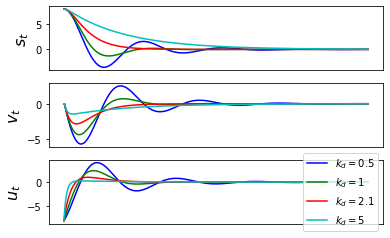

In [2]:
import numpy as np
from numpy import linalg as lg

# Plot results.
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(311)


###############################
m = 1

A = np.array([[0, 1], [0, 0]])
B = np.array([[0], [1/m]])

kd = 1

kp_list = [0.2, 0.5, 2, 5, 10]
color_list = ['b', 'g', 'r', 'c']

tol = 10**-3

for kp, col in zip(kp_list, color_list):

    K = np.array([kp, kd])

    # closed loop dynamics
    A_closed_loop = np.array([[0, 1], [-kp/m, -kd/m]])

    # compute Eigenvalues and make sure they have negative real part
    Eigenvalues, Eigenvectors = lg.eig(A_closed_loop)

    Lambda = np.diag(Eigenvalues)

    print(Eigenvalues)

    T = Eigenvectors
    Tinv = np.linalg.inv(Eigenvectors)

    A_closed_loop_check = T.dot(Lambda).dot(Tinv)

    print(A_closed_loop_check)

    x0 = np.array([[10], [0]])

    max_steps = 500

    n = 2
    x = np.zeros((n, max_steps))

    delta_t = 0.05

    s_vec = [x0[0]]
    v_vec = [x0[1]]
    u_vec = []

    assert(np.real(Eigenvalues[0]) < tol)
    assert(np.real(Eigenvalues[1]) < tol)

    for k in range(max_steps):

        t = delta_t * k

        matrix_exponential = np.array([[np.exp(Eigenvalues[0]*t), 0], [0, np.exp(Eigenvalues[1]*t)]])

        x_t = T.dot(matrix_exponential).dot(Tinv).dot(x0)

        u = -K.dot(x_t)

        s_vec.append(np.real(x_t[0][0]))
        v_vec.append(np.real(x_t[1][0]))
        u_vec.append(np.real(u[0]))


    kp_str = '$k_p = ' + str(kp) + '$'

    plt.subplot(3,1,1)
    plt.plot(s_vec, label=kp_str, color=col)
    plt.ylabel(r"$s_t$", fontsize=16)
    plt.xticks([])

    plt.subplot(3,1,2)
    plt.plot(v_vec, label=kp_str, color=col)
    plt.ylabel(r"$v_t$", fontsize=16)
    plt.xticks([])


    plt.subplot(3,1,3)
    plt.plot(u_vec, label=kp_str, color=col)
    plt.ylabel(r"$u_t$", fontsize=16)
    plt.xticks([])

plt.legend(loc='right')
plt.savefig('PID_kp.pdf')
plt.close()


kp = 1
kd_list = [0.5, 1, 2.1, 5, 10]
color_list = ['b', 'g', 'r', 'c']

for kd, col in zip(kd_list, color_list):

    K = np.array([kp, kd])

    # closed loop dynamics
    A_closed_loop = np.array([[0, 1], [-kp/m, -kd/m]])

    # compute Eigenvalues and make sure they have negative real part
    Eigenvalues, Eigenvectors = lg.eig(A_closed_loop)

    Lambda = np.diag(Eigenvalues)

    print(Eigenvalues)

    T = Eigenvectors
    Tinv = np.linalg.inv(Eigenvectors)

    A_closed_loop_check = T.dot(Lambda).dot(Tinv)

    print(A_closed_loop_check)

    x0 = np.array([[8], [0]])

    max_steps = 500

    n = 2
    x = np.zeros((n, max_steps))

    delta_t = 0.05

    s_vec = [x0[0]]
    v_vec = [x0[1]]
    u_vec = []


    assert(np.real(Eigenvalues[0]) < tol)
    assert(np.real(Eigenvalues[1]) < tol)

    for k in range(max_steps):

        t = delta_t * k

        matrix_exponential = np.array([[np.exp(Eigenvalues[0]*t), 0], [0, np.exp(Eigenvalues[1]*t)]])

        x_t = T.dot(matrix_exponential).dot(Tinv).dot(x0)

        u = -K.dot(x_t)

        s_vec.append(np.real(x_t[0][0]))
        v_vec.append(np.real(x_t[1][0]))
        u_vec.append(np.real(u[0]))


    kp_str = '$k_d = ' + str(kd) + '$'

    plt.subplot(3,1,1)
    plt.plot(s_vec, label=kp_str, color=col)
    plt.ylabel(r"$s_t$", fontsize=16)
    plt.xticks([])

    plt.subplot(3,1,2)
    plt.plot(v_vec, label=kp_str, color=col)
    plt.ylabel(r"$v_t$", fontsize=16)
    plt.xticks([])


    plt.subplot(3,1,3)
    plt.plot(u_vec, label=kp_str, color=col)
    plt.ylabel(r"$u_t$", fontsize=16)
    plt.xticks([])

plt.legend(loc='right')
plt.show()


